<h2>Aluno: Luciano Roberto</h2>
<br>
<h2>Matrícula: 0050005859</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = load_boston()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [3]:
#Mostrando os primeiro registros
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Checando numero de linhas e colunas (rows, columns)
data.shape

(506, 13)

In [5]:
# Quantas features possui
print(dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Qual é o campo Target(respostas) dessa base?
dataset['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


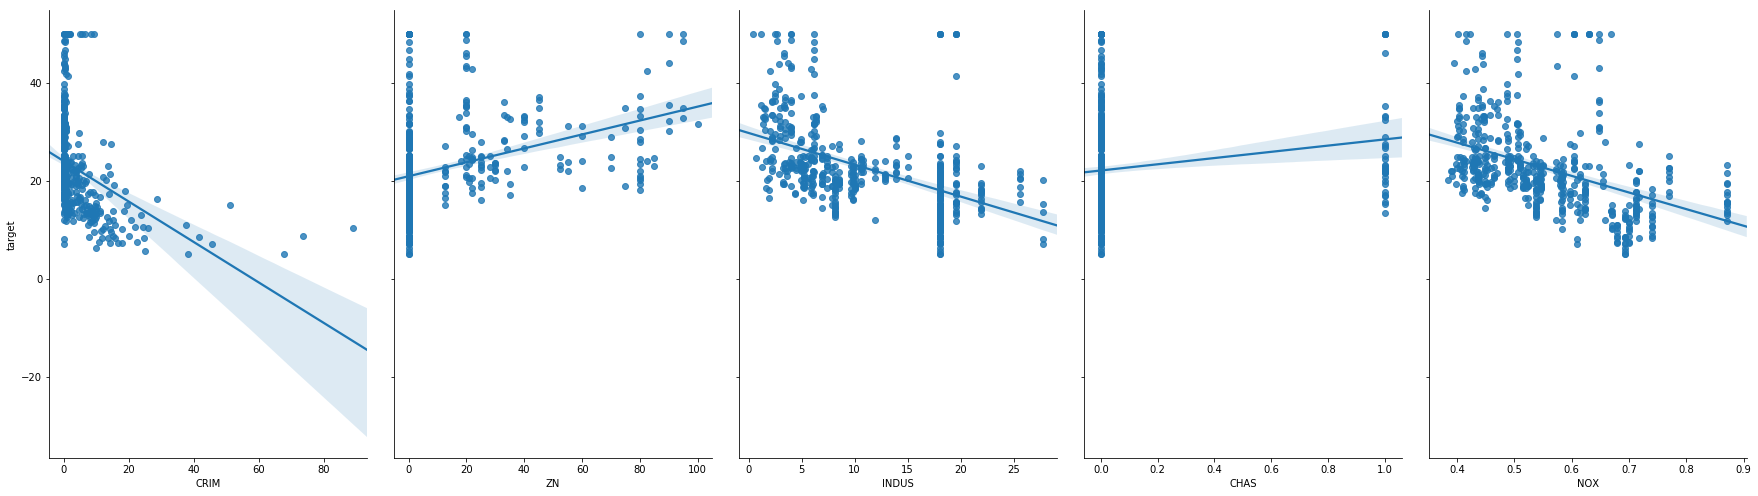

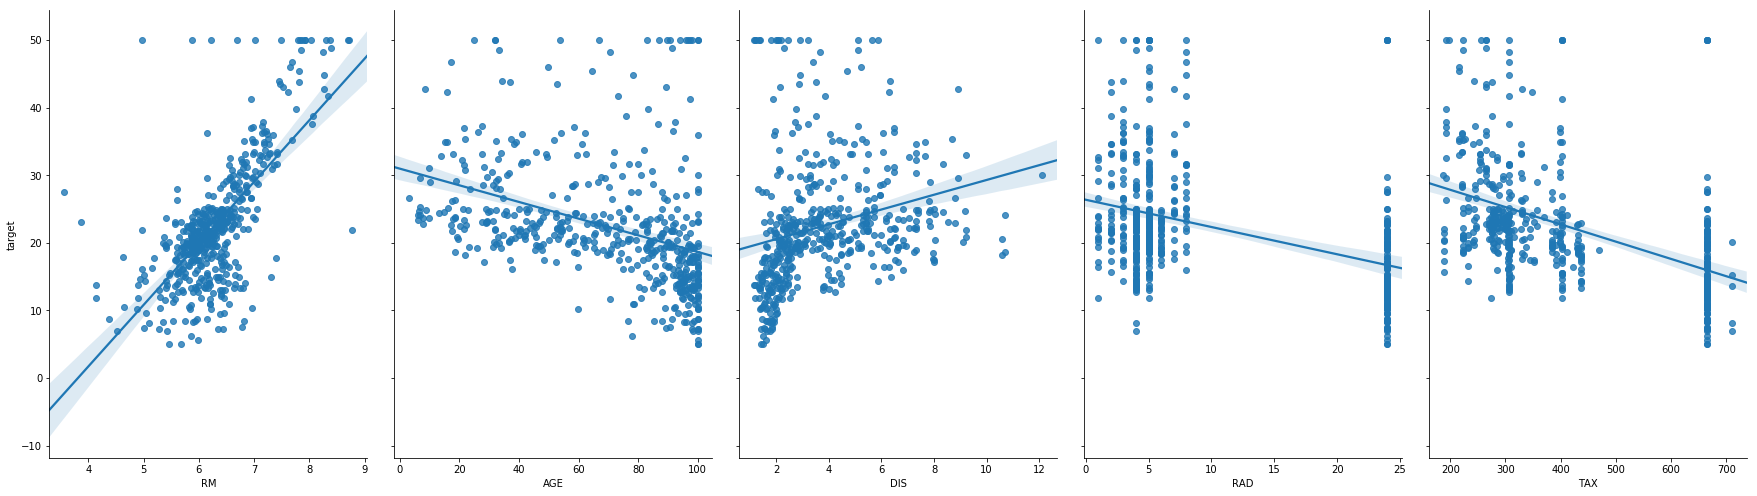

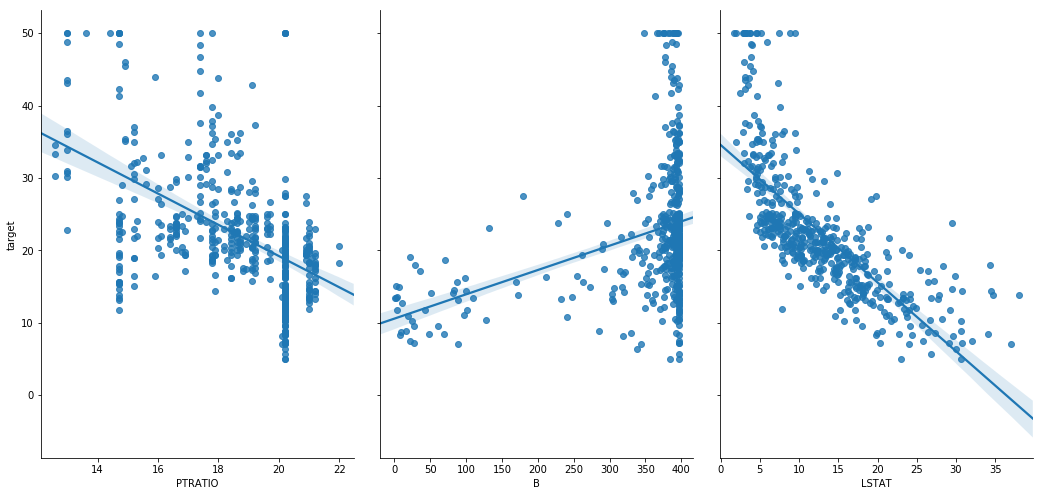

In [7]:
# Usando a biblioteca de visualização seaborn, plote o gráfico que mostra a relação entre as features e responses
data['target'] = dataset.target
sns.pairplot(data, x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX'], y_vars='target', size=7, aspect=0.7, kind='reg')
sns.pairplot(data, x_vars=['RM', 'AGE', 'DIS', 'RAD', 'TAX'], y_vars='target', size=7, aspect=0.7, kind='reg')
sns.pairplot(data, x_vars=['PTRATIO', 'B', 'LSTAT'], y_vars='target', size=7, aspect=0.7, kind='reg')

In [8]:
# Preparando X e y usando o pandas

feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x = data[feature_cols]

y = data['target']
y = data.target

In [9]:
# Qual o tipo de dados de X e y?
print('Os tipos de dados de X e y são: ' + str(type(x)) +', '+ str(type(y)))

Os tipos de dados de X e y são: <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.series.Series'>


In [10]:
# Sobre o que se trata essa base de dados? Que tipo de informações ela guarda?

print(dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
# Gere um X de treino e y de treino, X de teste e y da base (Split Train/Test)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(379, 13)
(379,)
(127, 13)
(127,)


In [12]:
# Qual o percentual gerado para criar o conjunto de treino e o conjunto de teste?
print('{0:.2f}%'.format((x_train.shape[0] + x_test.shape[0] / 100)))

380.27%


In [13]:
# Usando modelo de regressão linear do sklearn, treine o modelo com o X e y de treino
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# Imprima os atributos de "intercept" e "coefficients" que foram gerados
print(linreg.intercept_)
print(linreg.coef_)

45.236415846056985
[-1.13256952e-01  5.70869807e-02  3.87621062e-02  2.43279795e+00
 -2.12706290e+01  2.86930027e+00  7.02105327e-03 -1.47118312e+00
  3.05187368e-01 -1.06649888e-02 -9.97404179e-01  6.39833822e-03
 -5.58425480e-01]


In [15]:
# Imprima o par "feature names" com os "coefficients"
list(zip(feature_cols, linreg.coef_))

[('CRIM', -0.11325695150325484),
 ('ZN', 0.057086980673967454),
 ('INDUS', 0.0387621061705701),
 ('CHAS', 2.4327979454811017),
 ('NOX', -21.270629005497163),
 ('RM', 2.8693002671025525),
 ('AGE', 0.007021053271749427),
 ('DIS', -1.4711831191291065),
 ('RAD', 0.3051873675841825),
 ('TAX', -0.01066498878281223),
 ('PTRATIO', -0.9974041787728967),
 ('B', 0.006398338224938453),
 ('LSTAT', -0.5584254800083318)]

In [16]:
# Faça uma previsão usando o conjunto de X de teste
y_pred = linreg.predict(x_test)
print(y_pred)

[32.37355169 27.95629215 18.07265446 21.63752354 18.92899165 19.96544181
 32.28164239 18.06690441 24.73681562 26.85560915 27.23448864 28.56695646
 21.19027273 26.94926544 23.38373688 20.89466993 17.10735967 37.72703514
 30.52697416  8.43947453 20.87218975 16.19528394 25.13903989 24.77783176
 31.41047378 10.97998688 13.79742537 16.80597997 35.94111289 14.71326657
 21.23984248 14.1500526  42.7175483  17.83367283 21.8471085  20.39714439
 17.4827441  26.99954163  9.82567275 20.00045231 24.27086068 21.06464573
 29.47336641 16.46410291 19.38632792 14.49124029 39.41204737 18.10233655
 26.21931924 20.56700238 25.08766866 24.48271997 25.02751143 26.85092251
  5.00787149 24.12962926 10.7060661  26.83809421 16.79966861 35.47116284
 19.49834974 27.43500479 16.57517584 19.11046881 10.97829442 32.04938666
 36.3187731  21.86383561 24.82654636 25.34497518 23.36898797  6.99865029
 16.82926036 20.2651223  20.74578444 21.85863245 34.18467273 27.95220552
 24.86087363 34.4298983  18.6153324  24.02883897 34

In [17]:
# Mostre a margem de erro, usando o método "Root Mean Squared Error (RMSE)"
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]
print('Margem de erro de: {0:.2f}%'.format(np.sqrt(metrics.mean_squared_error(true, pred))))

Margem de erro de: 12.25%


In [18]:
# Existe uma forma de melhorar essa margem para que fique menor? Se sim, como seria?

# create a Python list of feature names
feature_cols = dataset.feature_names

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.target

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print ('Margem de erro de: {0:.2f}%'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Margem de erro de: 4.68%
